In [1]:
import numpy as np
from scipy.interpolate import griddata
from matplotlib import pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from labellines import labelLine, labelLines

from PhotochemPy import PhotochemPy, io

from GOE_utils import get_sweep_results, CH4_flux

# Figure 1

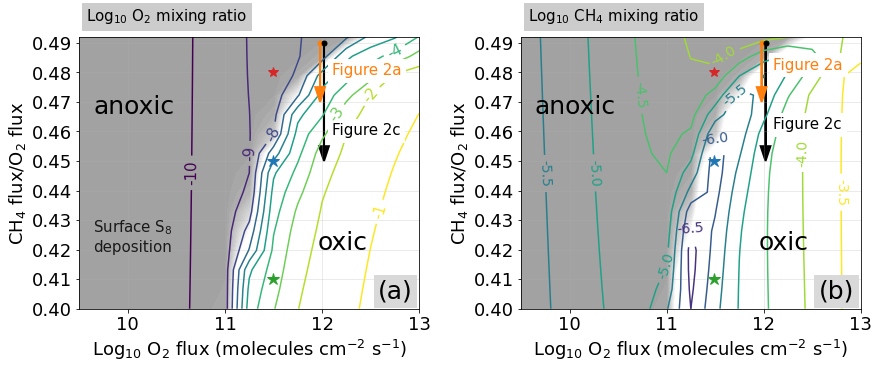

In [2]:
FCH4_FO2, FO2, O2, FCH4, CH4, S8, redox_column = get_sweep_results("ArcheanOutgassing_sweep")

lowerlim = .4
upperlim = .492
n = 15

ms1 = 5
lw1 = 2

plt.rcParams.update({'font.size': 18})
fig,[ax,ax1] = plt.subplots(1,2,figsize=[14,5])
fig.patch.set_facecolor("w")

ax.grid(alpha=.3)
ax.set_xlabel('Log$_{10}$ O$_2$ flux (molecules cm$^{-2}$ s$^{-1}$)')
ax.set_ylabel('CH$_4$ flux/O$_2$ flux')
ax.set_xlim(9.5,13)
ax.set_ylim(lowerlim,upperlim)
ax.set_yticks(np.arange(lowerlim,upperlim,.01))

ax1.grid(alpha=.3)
ax1.set_xlabel('Log$_{10}$ O$_2$ flux (molecules cm$^{-2}$ s$^{-1}$)')
ax1.set_ylabel('CH$_4$ flux/O$_2$ flux')
ax1.set_xlim(9.5,13)
ax1.set_ylim(lowerlim,upperlim)
ax1.set_yticks(np.arange(lowerlim,upperlim,.01))

### a ###

xi = np.linspace(9.5, 13,n)
yi = np.linspace(lowerlim, upperlim, n)
zi = griddata((FO2, FCH4_FO2), O2, (xi[None,:], yi[:,None]), method='linear')

cs = ax.contour(xi, yi, zi, np.arange(-10,0,1))
ax.clabel(cs,[-10,-9,-8,-4,-3,-2,-1],fmt='%i',fontsize=15)

xi = np.linspace(9.5, 13,n)
yi = np.linspace(lowerlim, upperlim, n)
zi = griddata((FO2, FCH4_FO2), S8, (xi[None,:], yi[:,None]), method='linear')
cmap_reversed = matplotlib.cm.get_cmap('gray_r')
cs1 = ax.contourf(xi, yi, zi, np.arange(-10,36,1),cmap=cmap_reversed)

ax.plot([11.98],[.49],c='C1',marker='o',ms=ms1)
ax.arrow(11.98,.49,0,-.02,color='C1',lw=lw1,width = .001,head_width=0.1, head_length=0.005,length_includes_head=True,zorder=1000)
ax.text(12.1, .478, 'Figure 2a', \
        size = 15,ha='left', va='bottom',backgroundcolor='w',color='C1')

ax.plot([12.02],[.49],c='k',marker='o',ms=ms1)
ax.arrow(12.02,.49,0,-.04,color='k',lw=lw1,width = .001,head_width=0.1, head_length=0.005,length_includes_head=True)
ax.text(12.1, .463, 'Figure 2c', \
        size = 15,ha='left', va='top',backgroundcolor='w',color='k')

ax.text(0.02, 1.04, 'Log$_{10}$ O$_2$ mixing ratio', \
        size = 15,ha='left', va='bottom',transform=ax.transAxes,backgroundcolor='.80')

ax.text(0.04, .2, 'Surface S$_8$\ndeposition', \
        size = 15,ha='left', va='bottom',transform=ax.transAxes,color='.1')

ax.text(0.04, .7, 'anoxic', \
        size = 25, ha='left', va='bottom',transform=ax.transAxes,color='0')
ax.text(.7, .2, 'oxic', \
        size = 25, ha='left', va='bottom',transform=ax.transAxes,color='0')

### b ###

xi = np.linspace(9.5, 13, n)
yi = np.linspace(lowerlim, upperlim, n)
zi = griddata((FO2, FCH4_FO2), CH4, (xi[None,:], yi[:,None]), method='linear')

cs = ax1.contour(xi, yi, zi, np.arange(-7,-3,.5),cmap='viridis')
ax1.clabel(cs,[-7,-6.5,-6,-5.5,-5,-4.5,-4,-3.5],fmt='%.1f',fontsize=14)

xi = np.linspace(9.5, 13,n)
yi = np.linspace(lowerlim, upperlim, n)
zi = griddata((FO2, FCH4_FO2), S8, (xi[None,:], yi[:,None]), method='linear')
cmap_reversed = matplotlib.cm.get_cmap('gray_r')
cs2 = ax1.contourf(xi, yi, zi, np.arange(-10,36,1),cmap=cmap_reversed)

ax1.text(0.02, 1.04, 'Log$_{10}$ CH$_4$ mixing ratio', \
        size = 15,ha='left', va='bottom',transform=ax1.transAxes,backgroundcolor='.80')

ax1.plot([11.98],[.49],c='C1',marker='o',ms=ms1)
ax1.arrow(11.98,.49,0,-.02,color='C1',lw=lw1,width = .001,head_width=0.1, head_length=0.005,length_includes_head=True,zorder=1000)
ax1.text(12.1, .48, 'Figure 2a', \
        size = 15,ha='left', va='bottom',backgroundcolor='w',color='C1')

ax1.plot([12.02],[.49],c='k',marker='o',ms=ms1)
ax1.arrow(12.02,.49,0,-.04,color='k',lw=lw1,width = .001,head_width=0.1, head_length=0.005,length_includes_head=True)
ax1.text(12.1, .465, 'Figure 2c', \
        size = 15,ha='left', va='top',backgroundcolor='w',color='k')

ax1.text(0.04, .7, 'anoxic', \
        size = 25, ha='left', va='bottom',transform=ax1.transAxes,color='0')
ax1.text(.7, .2, 'oxic', \
        size = 25, ha='left', va='bottom',transform=ax1.transAxes,color='0')

### settings

ax.text(.98, .02, '(a)', \
        size = 25,ha='right', va='bottom',transform=ax.transAxes,backgroundcolor='.85')
ax1.text(.98, .02, '(b)', \
        size = 25,ha='right', va='bottom',transform=ax1.transAxes,backgroundcolor='.85')

ax.plot([np.log10(3.100e+11)],[.48],'C3*',zorder=11,ms=10)
ax.plot([np.log10(3.100e+11)],[.45],'C0*',zorder=11,ms=12)
ax.plot([np.log10(3.100e+11)],[0.41],'C2*',zorder=11,ms=12)
ax1.plot([np.log10(3.100e+11)],[.48],'C3*',zorder=11,ms=10)
ax1.plot([np.log10(3.100e+11)],[.45],'C0*',zorder=11,ms=12)
ax1.plot([np.log10(3.100e+11)],[0.41],'C2*',zorder=11,ms=12)


plt.subplots_adjust(wspace=.3)
plt.savefig('figures/ArcheanOutgassing_sweep.pdf',bbox_inches='tight')
plt.show()

# Figure 2

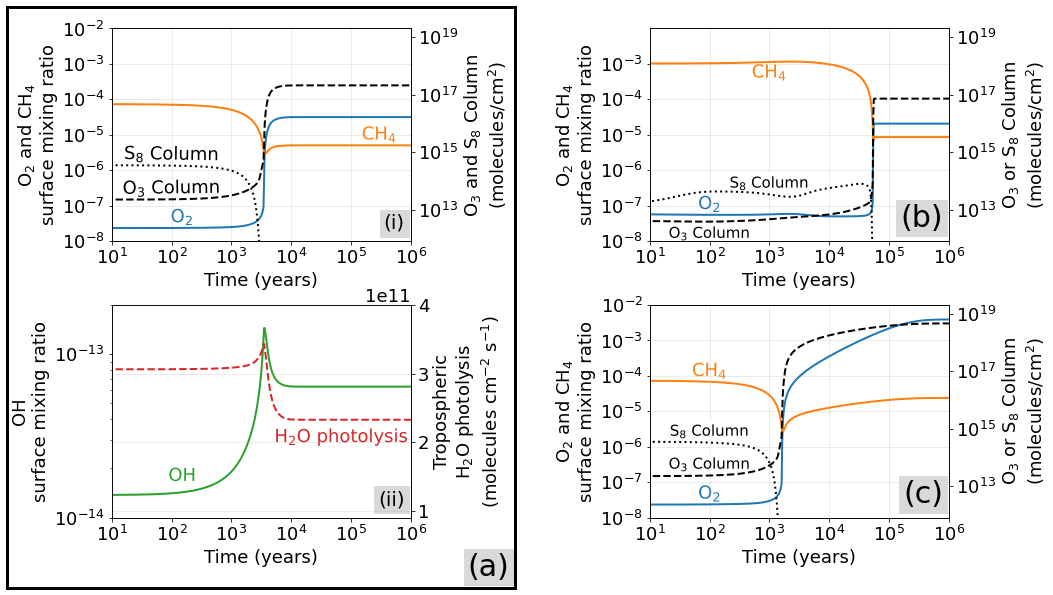

In [5]:
sol = io.read_evolve_output('ZAHNLE_start_FO2=1e12_0.49_end_FO2=1e12_0.47.dat')

plt.rcParams.update({'font.size': 18})
fig,[[ax1,ax3],[ax2,ax4]] = plt.subplots(2,2,figsize=[15,9],sharex=False)
fig.patch.set_facecolor("w")
yr = 365*24*60*60

############
# Figure a #
############

# i

species = ['O2','CH4']
labels = ['O$_2$','CH$_4$']
for i,sp in enumerate(species):
    ax1.plot(sol['time'][:-1]/yr,sol[sp][:-1,0],'C'+str(i),lw=2,label=labels[i])
    
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel('O$_2$ and CH$_4$\nsurface mixing ratio')
ax1.set_xlim(1e1,1e6)
ax1.set_xticks(10.0**np.arange(1,7,1))
ax1.grid(alpha=.3)
ax1.set_ylim(1e-8,1e-2)
ax1.set_yticks(10.0**np.arange(-8,-1,1))
ax1.set_xlabel('Time (years)')
labelLines(ax1.get_lines(),xvals=[150,3e5],yoffsets=.3,yoffset_logspace=True,align=True,zorder=0)

ax1_1 = ax1.twinx()

dz = sol['alt'][1] - sol['alt'][0]
O3column = np.array([np.sum(sol['O3'][i,:]*dz*sol['den'][i]) for i in range(len(sol['time']))])
ax1_1.plot(sol['time']/yr,O3column,'k--',lw=2,label='O$_3$ Column')
S8column = np.array([np.sum(sol['S8AER'][i,:]*dz*sol['den'][i]) for i in range(len(sol['time']))])
ax1_1.plot(sol['time']/yr,S8column,'k:',lw=2,label='S$_8$ Column')
ax1_1.set_yscale('log')
ax1_1.set_ylim(8e11,2e19)
ax1_1.set_ylabel('O$_3$ and S$_8$ Column\n(molecules/cm$^2$)')
labelLines(ax1_1.get_lines(),xvals=[1e2,1e2],yoffsets=.4,yoffset_logspace=True,align=True,zorder=0)

# ii

dz = sol['alt'][1]-sol['alt'][0]

ax2.plot(sol['time']/yr,sol['OH'][:,0],'C2-',lw=2,label='OH')
labelLines(ax2.get_lines(),xvals=[150],yoffsets=.1,yoffset_logspace=True,align=True,zorder=0)
ax2.set_ylabel('OH\nsurface mixing ratio')
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylim(1e-14,2e-13)
ax2.set_xlim(1e1,1e6)
ax2.set_xticks(10.0**np.arange(1,7,1))
ax2.set_xlabel('Time (years)')

ax2_2 = ax2.twinx()

prates = np.array([np.sum(sol['H2O_prates'][i,:22]*dz) for i in range(len(sol['time']))])
ax2_2.plot(sol['time']/yr,prates,'C3--',lw=2,label='H$_2$O photolysis')
labelLines(ax2_2.get_lines(),xvals=[.7e5],yoffsets=-.05,yoffset_logspace=True,align=False,zorder=0)
ax2_2.set_ylabel('Tropospheric\nH$_2$O photolysis\n(molecules cm$^{-2}$ s$^{-1}$)')
ax2_2.grid(alpha=.3)
ax2_2.set_ylim(0.9e11,4e11)

# labels and box
ax1.text(0.98, .04, '(i)', \
        size = 20,ha='right', va='bottom',transform=ax1.transAxes,backgroundcolor='.85')
ax2.text(0.98, .04, '(ii)', \
        size = 20,ha='right', va='bottom',transform=ax2.transAxes,backgroundcolor='.85')
rec = matplotlib.patches.Rectangle((-.35,-.33), 1.7, 2.73, fill=False, lw=3, clip_on=False,transform=ax2.transAxes)
rec = ax2.add_patch(rec)

ax2.text(1.33
         ,-.30, '(a)', \
        size = 30,ha='right', va='bottom',transform=ax2.transAxes,backgroundcolor='.85')


############
# Figure b #
############
sol = io.read_evolve_output('CASE1_start_FO2=1e12_0.45_end_FO2=1.8e12_0.45.dat')

species = ['O2','CH4']
labels = ['O$_2$','CH$_4$']
for i,sp in enumerate(species):
    ax3.plot(sol['time'][:]/yr,sol[sp][:,0],'-',lw=2,label=labels[i])

ax3.set_yscale('log')
ax3.set_ylabel('O$_2$ and CH$_4$\nsurface mixing ratio')
ax3.set_xscale('log')
ax3.set_xlim(1e1,1e6)
ax3.set_xticks(10.0**np.arange(1,7,1))
ax3.set_ylim(1e-8,1e-2)
ax3.set_yticks(10.0**np.arange(-8,-2,1))
ax3.grid(alpha=.3)
ax3.set_xlabel('Time (years)')
# ax.legend(ncol=1,bbox_to_anchor=(0, 1.02), loc='lower left')
labelLine(ax3.get_lines()[0],1e2,yoffset=.3,yoffset_logspace=True,align=False,zorder=0)
labelLine(ax3.get_lines()[1],1e3,yoffset=-.3,yoffset_logspace=True,align=False,zorder=0)

ax3_1 = ax3.twinx()
dz = sol['alt'][1]-sol['alt'][0]
O3column = np.array([np.sum(sol['O3'][i,:]*dz*sol['den'][i]) for i in range(len(sol['time']))])
S8column = np.array([np.sum(sol['S8AER'][i,:]*dz*sol['den'][i]) for i in range(len(sol['time']))])
ax3_1.plot(sol['time']/yr,O3column,'k--',lw=2,label='O$_3$ Column')
ax3_1.plot(sol['time']/yr,S8column,'k:',lw=2,label='S$_8$ Column')
ax3_1.set_yscale('log')
ax3_1.set_ylabel('O$_3$ or S$_8$ Column\n(molecules/cm$^2$)')
# ax1.legend(ncol=1,bbox_to_anchor=(1, 1.02), loc='lower right')
labelLine(ax3_1.get_lines()[0],1e2,yoffset=-.4,yoffset_logspace=True,align=False,zorder=0,size=15)
labelLine(ax3_1.get_lines()[1],1e3,yoffset=.4,yoffset_logspace=True,align=False,zorder=0,size=15)
ax3_1.set_ylim(8e11,2e19)

ax3.text(0.98, .04, '(b)', \
        size = 30,ha='right', va='bottom',transform=ax3.transAxes,backgroundcolor='.85')

############
# Figure c #
############
sol = io.read_evolve_output('ZAHNLE_start_FO2=1e12_0.49_end_FO2=1e12_0.45.dat')

species = ['O2','CH4']
labels = ['O$_2$','CH$_4$']
for i,sp in enumerate(species):
    ax4.plot(sol['time'][:]/yr,sol[sp][:,0],'-',lw=2,label=labels[i])

ax4.set_yscale('log')
ax4.set_ylabel('O$_2$ and CH$_4$\nsurface mixing ratio')
ax4.set_xscale('log')
ax4.set_xlim(1e1,1e6)
ax4.set_xticks(10.0**np.arange(1,7,1))
ax4.set_ylim(1e-8,1e-2)
ax4.set_yticks(10.0**np.arange(-8,-1,1))
ax4.grid(alpha=.3)
ax4.set_xlabel('Time (years)')
labelLine(ax4.get_lines()[0],1e2,yoffset=.3,yoffset_logspace=True,align=False,zorder=0)
labelLine(ax4.get_lines()[1],1e2,yoffset=.3,yoffset_logspace=True,align=False,zorder=0)

ax4_1 = ax4.twinx()
dz = sol['alt'][1]-sol['alt'][0]
O3column = np.array([np.sum(sol['O3'][i,:]*dz*sol['den'][i]) for i in range(len(sol['time']))])
S8column = np.array([np.sum(sol['S8AER'][i,:]*dz*sol['den'][i]) for i in range(len(sol['time']))])
ax4_1.plot(sol['time']/yr,O3column,'k--',lw=2,label='O$_3$ Column')
ax4_1.plot(sol['time']/yr,S8column,'k:',lw=2,label='S$_8$ Column')
ax4_1.set_yscale('log')
ax4_1.set_ylabel('O$_3$ or S$_8$ Column\n(molecules/cm$^2$)')
labelLine(ax4_1.get_lines()[0],1e2,yoffset=.4,yoffset_logspace=True,align=False,zorder=0,size=15)
labelLine(ax4_1.get_lines()[1],1e2,yoffset=.4,yoffset_logspace=True,align=False,zorder=0,size=15)
ax4_1.set_ylim(8e11,2e19)

ax4.text(0.98, .04, '(c)', \
        size = 30,ha='right', va='bottom',transform=ax4.transAxes,backgroundcolor='.85')

########
# save #
########

plt.subplots_adjust(hspace=.3, wspace=0.8)
plt.savefig('figures/Oxygenation.pdf',bbox_inches='tight')
plt.show()

# Figure 3

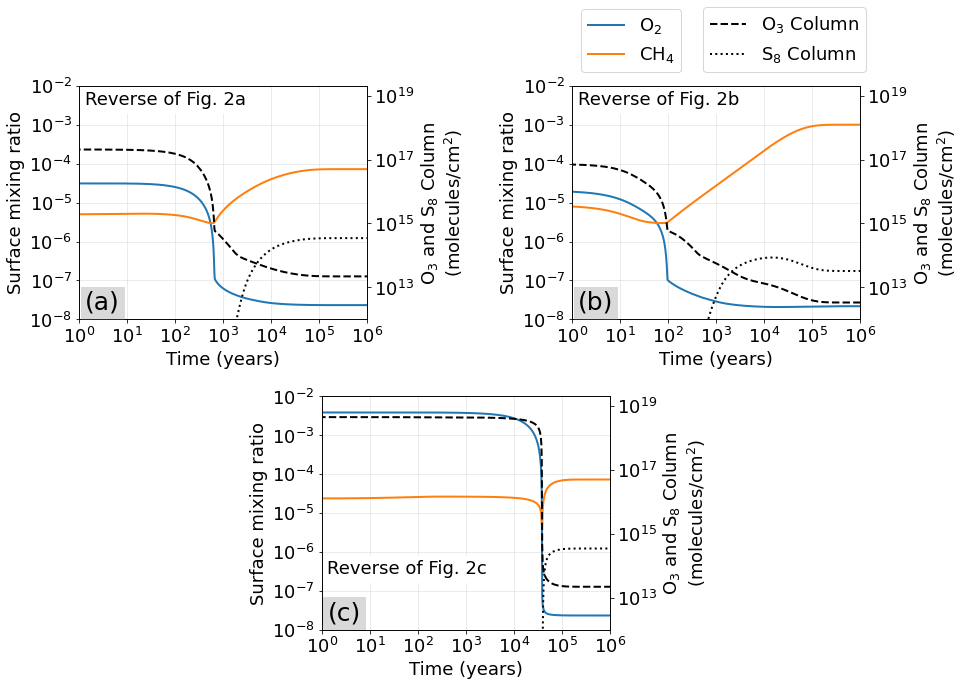

In [6]:

plt.rcParams.update({'font.size': 18})
fig = plt.figure(constrained_layout=False,figsize=[14,10])
fig.patch.set_facecolor("w")
gs = fig.add_gridspec(100, 100)
ax1 = fig.add_subplot(gs[:43, :37])
ax2 = fig.add_subplot(gs[:43, 63:])
ax3 = fig.add_subplot(gs[57:100, 31:68])
yr = 365*24*60*60

############
# Figure a #
############

sol = io.read_evolve_output('ZAHNLE_start_FO2=1e12_0.47_end_FO2=1e12_0.49.dat')

species = ['O2','CH4']
labels = ['O$_2$','CH$_4$']
colors = ['C0','C1']
for i,sp in enumerate(species):
    ax1.plot(sol['time'][:]/yr,sol[sp][:,0],colors[i]+'-',lw=2,label=labels[i])

ax1.set_yscale('log')
ax1.set_ylabel('Surface mixing ratio')
ax1.set_xscale('log')
ax1.set_xlim(1e0,1e6)
ax1.grid(alpha=.3)
ax1.set_xlabel('Time (years)')

ax1_1 = ax1.twinx()
dz = sol['alt'][1]-sol['alt'][0]
O3column = np.array([np.sum(sol['O3'][i,:]*dz*sol['den'][i]) for i in range(len(sol['time']))])
ax1_1.plot(sol['time']/yr,O3column,'k--',lw=2,label='O$_3$ Column')
S8column = np.array([np.sum(sol['S8AER'][i,:]*dz*sol['den'][i]) for i in range(len(sol['time']))])
ax1_1.plot(sol['time']/yr,S8column,'k:',lw=2,label='S$_8$ Column')
ax1_1.set_yscale('log')
ax1_1.set_ylabel('O$_3$ and S$_8$ Column\n(molecules/cm$^2$)')

############
# Figure b #
############

sol = io.read_evolve_output('CASE1_start_FO2=1.8e12_0.45_end_FO2=1e12_0.45.dat')

species = ['O2','CH4']
labels = ['O$_2$','CH$_4$']
colors = ['C0','C1']
for i,sp in enumerate(species):
    ax2.plot(sol['time'][:]/yr,sol[sp][:,0],colors[i]+'-',lw=2,label=labels[i])

ax2.set_yscale('log')
ax2.set_ylabel('Surface mixing ratio')
ax2.set_xscale('log')
ax2.set_xlim(1e0,1e6)
ax2.grid(alpha=.3)
ax2.set_xlabel('Time (years)')
ax2.legend(ncol=1,bbox_to_anchor=(0, 1.02), loc='lower left')

ax2_1 = ax2.twinx()
dz = sol['alt'][1]-sol['alt'][0]
O3column = np.array([np.sum(sol['O3'][i,:]*dz*sol['den'][i]) for i in range(len(sol['time']))])
ax2_1.plot(sol['time']/yr,O3column,'k--',lw=2,label='O$_3$ Column')
S8column = np.array([np.sum(sol['S8AER'][i,:]*dz*sol['den'][i]) for i in range(len(sol['time']))])
ax2_1.plot(sol['time']/yr,S8column,'k:',lw=2,label='S$_8$ Column')
ax2_1.set_yscale('log')
ax2_1.set_ylabel('O$_3$ and S$_8$ Column\n(molecules/cm$^2$)')
ax2_1.legend(ncol=1,bbox_to_anchor=(1.05, 1.02), loc='lower right')

############
# Figure c #
############

sol = io.read_evolve_output('ZAHNLE_start_FO2=1e12_0.45_end_FO2=1e12_0.49.dat')
species = ['O2','CH4']
labels = ['O$_2$','CH$_4$']
colors = ['C0','C1']
for i,sp in enumerate(species):
    ax3.plot(sol['time'][:]/yr,sol[sp][:,0],colors[i]+'-',lw=2,label=labels[i])

ax3.set_yscale('log')
ax3.set_ylabel('Surface mixing ratio')
ax3.set_xscale('log')
ax3.grid(alpha=.3)
ax3.set_xlabel('Time (years)')

ax3_1 = ax3.twinx()
dz = sol['alt'][1]-sol['alt'][0]
O3column = np.array([np.sum(sol['O3'][i,:]*dz*sol['den'][i]) for i in range(len(sol['time']))])
ax3_1.plot(sol['time']/yr,O3column,'k--',lw=2,label='O$_3$ Column')
S8column = np.array([np.sum(sol['S8AER'][i,:]*dz*sol['den'][i]) for i in range(len(sol['time']))])
ax3_1.plot(sol['time']/yr,S8column,'k:',lw=2,label='S$_8$ Column')
ax3_1.set_yscale('log')
ax3_1.set_ylabel('O$_3$ and S$_8$ Column\n(molecules/cm$^2$)')

############
# settings #
############

ax1.set_ylim(1e-8,1e-2)
ax2.set_ylim(1e-8,1e-2)
ax3.set_ylim(1e-8,1e-2)
ax1.set_yticks(10.0**np.arange(-8,-1,1))
ax2.set_yticks(10.0**np.arange(-8,-1,1))
ax3.set_yticks(10.0**np.arange(-8,-1,1))

ax1.set_xlim(1e0,1e6)
ax2.set_xlim(1e0,1e6)
ax3.set_xlim(1e0,1e6)
ax1.set_xticks(10.**np.arange(0,7,1))
ax2.set_xticks(10.**np.arange(0,7,1))
ax3.set_xticks(10.**np.arange(0,7,1))

ax1_1.set_ylim(1e12,2e19)
ax2_1.set_ylim(1e12,2e19)
ax3_1.set_ylim(1e12,2e19)

# labels

ax1.text(0.02, .02, '(a)', \
        size = 25,ha='left', va='bottom',transform=ax1.transAxes,backgroundcolor='.85')
ax2.text(0.02, .02, '(b)', \
        size = 25,ha='left', va='bottom',transform=ax2.transAxes,backgroundcolor='.85')
ax3.text(0.02, .02, '(c)', \
        size = 25,ha='left', va='bottom',transform=ax3.transAxes,backgroundcolor='.85')

ax1.text(0.02, .98, 'Reverse of Fig. 2a', \
        size = 18,ha='left', va='top',transform=ax1.transAxes,backgroundcolor='1')
ax2.text(0.02, .98, 'Reverse of Fig. 2b', \
        size = 18,ha='left', va='top',transform=ax2.transAxes,backgroundcolor='1')
ax3.text(0.02, .3, 'Reverse of Fig. 2c', \
        size = 18,ha='left', va='top',transform=ax3.transAxes,backgroundcolor='1')


plt.savefig('figures/Reversibility.pdf',bbox_inches='tight')
plt.show()

# Figure 4

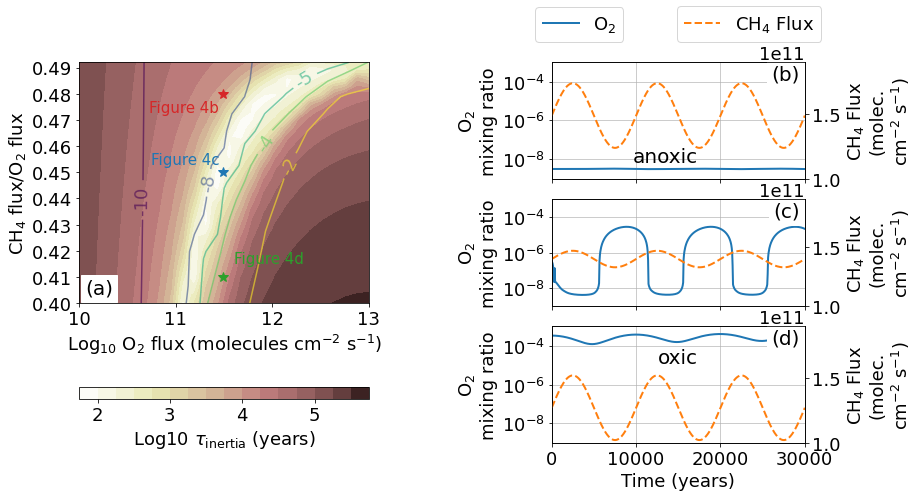

In [7]:
plt.rcParams.update({'font.size': 18})
fig = plt.figure(constrained_layout=False,figsize=[13,7])
fig.patch.set_facecolor("w")
gs = fig.add_gridspec(150, 100)
ax1 = fig.add_subplot(gs[0:95, :40])
ax = fig.add_subplot(gs[0:46, 65:100])
ax3 = fig.add_subplot(gs[54:96, 65:100])
ax5 = fig.add_subplot(gs[104:150, 65:100])
xlim1 = 10000*3
yr = 365*24*60*60

############
# Figure a #
############

FCH4_FO2, FO2, O2, FCH4, CH4, S8, redox_column = get_sweep_results("ArcheanOutgassing_sweep")
characteristic_flux = 0.1*2*10**FO2
tau_stability = np.log10((10**(redox_column)/(characteristic_flux)/yr))

lowerlim = .4
upperlim = .492
n = 15
xi = np.linspace(10, 13,n)
yi = np.linspace(lowerlim, upperlim, n)
zi = griddata((FO2, FCH4_FO2), O2, (xi[None,:], yi[:,None]), method='linear')
cs = ax1.contour(xi, yi, zi, [-10,-8,-5,-4,-2],alpha=.6)
ax1.clabel(cs,[-10,-8,-5,-4,-2],fmt='%i')
n = 30
xi = np.linspace(9.5, 13,n)
yi = np.linspace(lowerlim, upperlim, n)
zi = griddata((FO2, FCH4_FO2), tau_stability, (xi[None,:], yi[:,None]), method='linear')
cmap_reversed = matplotlib.cm.get_cmap('pink_r')
cs = ax1.contourf(xi, yi, zi,15,cmap=cmap_reversed)
axins = inset_axes(ax1,
                   width="100%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(0, -.4, 1, 1),
                   bbox_transform=ax1.transAxes,
                   borderpad=0,
                   )
cbar = fig.colorbar(cs, ticks=np.arange(-1,6,1),cax=axins, shrink=0.8,orientation="horizontal")
cbar.set_label(r'Log10 $\tau_\mathrm{inertia}$ (years)', rotation=0)
ax1.set_xlim(10,13)
ax1.set_ylim(lowerlim,upperlim)
ax1.set_yticks(np.arange(lowerlim,upperlim,.01))
ax1.set_xlabel('Log$_{10}$ O$_2$ flux (molecules cm$^{-2}$ s$^{-1}$)')
ax1.set_ylabel('CH$_4$ flux/O$_2$ flux')

############
# Figure b #
############

sol = io.read_evolve_output('ZAHNLE_FO2=3.100e+11_oscillate_0.480_amp=2.5e10_T=1e4yr.dat')
species = ['O2']
labels = ['O$_2$','CH$_4$']
for i,sp in enumerate(species):
    ax.plot(sol['time'][:]/yr,sol[sp][:,0],'-',lw=2,label=labels[i])
ax.set_yscale('log')
ax.set_ylabel('O$_2$\nmixing ratio')
ax.set_ylim(1e-9,1e-3)
ax.set_yticks(10.**np.arange(-8,-3,2))
ax.set_xlim(0,xlim1)
ax.grid(alpha=.8)
ax.text(0.45, .11, 'anoxic', \
        size = 20, ha='center', va='bottom',transform=ax.transAxes,color='0')
ax.set_xticklabels([])
ax2 = ax.twinx()
ax2.plot(sol['time']/yr, CH4_flux(sol['time'],3.100e+11*.48,2.5e10,1e4*yr),'C1--',lw=2,label='CH$_4$ Flux')
ax2.set_ylim(.7e11,2.1e11)
ax2.set_yticks(np.array([1,1.5,2])*1e11)
ax2.set_ylabel('CH$_4$ Flux\n(molec.\ncm$^{-2}$ s$^{-1}$)')

ax.legend(ncol=1,bbox_to_anchor=(-.1, 1.1), loc='lower left')
ax2.legend(ncol=1,bbox_to_anchor=(1.1, 1.1), loc='lower right')

############
# Figure c #
############

sol = io.read_evolve_output('ZAHNLE_FO2=3.100e+11_oscillate_0.450_amp=0.7e10_T=1e4yr.dat')
# species = ['O2','CH4']
labels = ['O$_2$','CH$_4$']
for i,sp in enumerate(species):
    ax3.plot(sol['time'][:]/yr,sol[sp][:,0],'-',lw=2,label=labels[i])
ax3.set_yscale('log')
ax3.set_ylabel('O$_2$\nmixing ratio')
ax3.set_ylim(1e-9,1e-3)
ax3.set_yticks(10.**np.arange(-8,-3,2))
ax3.set_xlim(0,xlim1)
ax3.grid(alpha=.8)
ax3.set_xticklabels([])
ax4 = ax3.twinx()
ax4.plot(sol['time']/yr, CH4_flux(sol['time'],3.100e+11*.45,0.7e10,1e4*yr),'C1--',lw=2,label='CH$_4$ Flux')
ax4.set_yticks(np.array([1,1.5,2])*1e11)
ax4.set_ylabel('CH$_4$ Flux\n(molec.\ncm$^{-2}$ s$^{-1}$)')

############
# Figure d #
############

sol = io.read_evolve_output('ZAHNLE_FO2=3.100e+11_oscillate_0.410_amp=2.5e10_T=1e4yr.dat')
# species = ['O2','CH4']
labels = ['O$_2$','CH$_4$']
for i,sp in enumerate(species):
    ax5.plot(sol['time'][:]/yr,sol[sp][:,0],'-',lw=2,label=labels[i])
ax5.set_yscale('log')
ax5.set_ylabel('O$_2$\nmixing ratio')
ax5.set_ylim(1e-9,1e-3)
ax5.set_yticks(10.**np.arange(-8,-3,2))
ax5.set_xlim(0,xlim1)
ax5.grid(alpha=.8)
ax5.set_xlabel('Time (years)')
ax5.text(0.5, .65, 'oxic', \
        size = 20, ha='center', va='bottom',transform=ax5.transAxes,color='0')
# ax5.set_xticks([0,200,400,600])
# ax5.set_xticklabels([])
ax6 = ax5.twinx()
ax6.plot(sol['time']/yr, CH4_flux(sol['time'],3.100e+11*.41,2.5e10,1e4*yr),'C1--',lw=2,label='CH$_4$ Flux')
# labelLine(ax5.get_lines()[0],200,yoffset=.3,yoffset_logspace=True,align=False,zorder=0)
# labelLine(ax5.get_lines()[1],100,yoffset=.3,yoffset_logspace=True,align=False,zorder=0)
# ax2.set_yscale('log')
ax6.set_ylim(.7e11,2.1e11)
ax6.set_yticks(np.array([1,1.5,2])*1e11)
ax6.set_ylabel('CH$_4$ Flux\n(molec.\ncm$^{-2}$ s$^{-1}$)')

ax2.set_ylim(1e11,1.9e11)
ax4.set_ylim(1e11,1.9e11)
ax6.set_ylim(1e11,1.9e11)

ax1.plot([np.log10(3.100e+11)],[.48],'C3*',zorder=11,ms=10)
ax1.text(11.45, .472, 'Figure 4b', \
        size = 15,ha='right', va='bottom',color='C3',alpha=1)
ax1.plot([np.log10(3.100e+11)],[.45],'C0*',zorder=11,ms=10)
ax1.text(11.45, .452, 'Figure 4c', \
        size = 15,ha='right', va='bottom',color='C0',alpha=1)
ax1.plot([np.log10(3.100e+11)],[0.41],'C2*',zorder=11,ms=10)
ax1.text(11.6, .42, 'Figure 4d', \
        size = 15,ha='left', va='top',color='C2',alpha=1)

ax1.text(0.02, .1, '(a)', \
        size = 20,ha='left', va='top',transform=ax1.transAxes,backgroundcolor='w')
ax.text(.98, .98, '(b)', \
        size = 20,ha='right', va='top',transform=ax.transAxes,backgroundcolor='w')
ax3.text(.98, .98, '(c)', \
        size = 20,ha='right', va='top',transform=ax3.transAxes,backgroundcolor='w')
ax5.text(.98, .98, '(d)', \
        size = 20,ha='right', va='top',transform=ax5.transAxes,backgroundcolor='w')

plt.savefig('figures/Stability.pdf',bbox_inches='tight')

plt.show()

# Figure S1

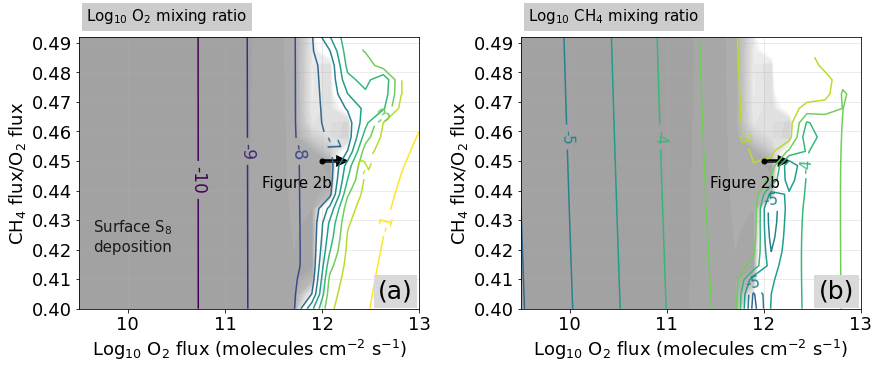

In [8]:
FCH4_FO2, FO2, O2, FCH4, CH4, S8, redox_column = get_sweep_results("ModernValues_sweep")


lowerlim = .4
upperlim = .492

plt.rcParams.update({'font.size': 18})
fig,[ax,ax1] = plt.subplots(1,2,figsize=[14,5])
fig.patch.set_facecolor("w")

ax.grid(alpha=.3)
ax.set_xlabel('Log$_{10}$ O$_2$ flux (molecules cm$^{-2}$ s$^{-1}$)')
ax.set_ylabel('CH$_4$ flux/O$_2$ flux')
ax.set_xlim(9.5,13)
ax.set_ylim(lowerlim,upperlim)
ax.set_yticks(np.arange(lowerlim,upperlim,.01))

ax1.grid(alpha=.3)
ax1.set_xlabel('Log$_{10}$ O$_2$ flux (molecules cm$^{-2}$ s$^{-1}$)')
ax1.set_ylabel('CH$_4$ flux/O$_2$ flux')
ax1.set_xlim(9.5,13)
ax1.set_ylim(lowerlim,upperlim)
ax1.set_yticks(np.arange(lowerlim,upperlim,.01))

### a ###
n = 20
xi = np.linspace(9.5, 13,n)
yi = np.linspace(lowerlim, upperlim, n)
zi = griddata((FO2, FCH4_FO2), O2, (xi[None,:], yi[:,None]), method='linear')

cs = ax.contour(xi, yi, zi, np.arange(-10,0,1))
ax.clabel(cs,[-10,-9,-8,-7,-3,-2,-1],fmt='%i',fontsize=17)

n = 20
xi = np.linspace(9.5, 13,n)
yi = np.linspace(lowerlim, upperlim, n)
zi = griddata((FO2, FCH4_FO2), S8, (xi[None,:], yi[:,None]), method='linear')
cmap_reversed = matplotlib.cm.get_cmap('gray_r')
cs1 = ax.contourf(xi, yi, zi, np.arange(-10,36,1),cmap=cmap_reversed)

ax.text(0.02, 1.04, 'Log$_{10}$ O$_2$ mixing ratio', \
        size = 15,ha='left', va='bottom',transform=ax.transAxes,backgroundcolor='.80')

ax.text(0.04, .2, 'Surface S$_8$\ndeposition', \
        size = 15,ha='left', va='bottom',transform=ax.transAxes,color='.1')

ax.plot([12],[.45],c='0',marker='o',ms=5)
ax.arrow(12,.45,np.log10(1.8e12)-12,0,color='0',lw=2,width = .0005,head_width=0.003
          , head_length=0.1,length_includes_head=True)
ax.text(11.38, .445, 'Figure 2b', \
        size = 15,ha='left', va='top',color='0',zorder=100000)


### b ###

n = 20
xi = np.linspace(9.5, 13, n)
yi = np.linspace(lowerlim, upperlim, n)
zi = griddata((FO2, FCH4_FO2), CH4, (xi[None,:], yi[:,None]), method='linear')

cs = ax1.contour(xi, yi, zi, np.arange(-7,-2,.5),cmap='viridis')
ax1.clabel(cs,np.arange(-7,-2,1),fmt='%i',fontsize=15)

n = 20
xi = np.linspace(9.5, 13,n)
yi = np.linspace(lowerlim, upperlim, n)
zi = griddata((FO2, FCH4_FO2), S8, (xi[None,:], yi[:,None]), method='linear')
cmap_reversed = matplotlib.cm.get_cmap('gray_r')
cs2 = ax1.contourf(xi, yi, zi, np.arange(-10,36,1),cmap=cmap_reversed)

ax1.text(0.02, 1.04, 'Log$_{10}$ CH$_4$ mixing ratio', \
        size = 15,ha='left', va='bottom',transform=ax1.transAxes,backgroundcolor='.80')

ax1.plot([12],[.45],c='0',marker='o',ms=5)
ax1.arrow(12,.45,np.log10(1.8e12)-12,0,color='0',lw=2,width = .0005,head_width=0.003
          , head_length=0.1,length_includes_head=True)
ax1.text(11.45, .445, 'Figure 2b', \
        size = 15,ha='left', va='top',color='0')

ax.text(.98, .02, '(a)', \
        size = 25,ha='right', va='bottom',transform=ax.transAxes,backgroundcolor='.85')
ax1.text(.98, .02, '(b)', \
        size = 25,ha='right', va='bottom',transform=ax1.transAxes,backgroundcolor='.85')

plt.subplots_adjust(wspace=.3)
plt.savefig('figures/ModernValues_sweep.pdf',bbox_inches='tight')
plt.show()

# Figure S3

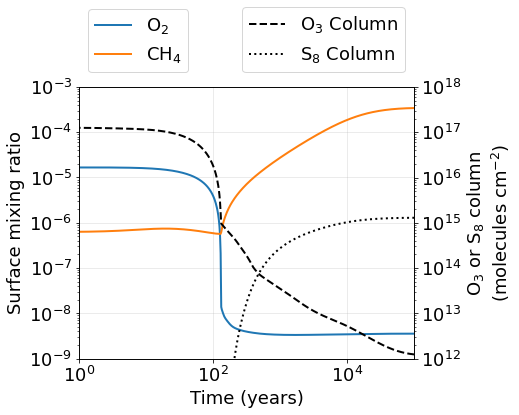

In [9]:
sol = io.read_evolve_output('ZAHNLE_start_FO2=3.1e11_0.44_end_FH2=1.9e11_FCO=2e10.dat')

plt.rcParams.update({'font.size': 18})
fig,ax = plt.subplots(1,1,figsize=[6,5])
fig.patch.set_facecolor("w")
yr = 365*24*60*60

species = ['O2','CH4']
labels = ['O$_2$','CH$_4$']
for i,sp in enumerate(species):
    ax.plot(sol['time'][:]/yr,sol[sp][:,0],'-',lw=2,label=labels[i])
    
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Surface mixing ratio')
ax.set_ylim(1e-9,1e-3)
ax.set_xlim(1,1e5)
ax.grid(alpha=.3)
ax.set_xlabel('Time (years)')
ax.legend(ncol=1,bbox_to_anchor=(0, 1.02), loc='lower left')

ax1 = ax.twinx()
dz = sol['alt'][1]-sol['alt'][0]
O3column = np.array([np.sum(sol['O3'][i,:]*dz*sol['den'][i]) for i in range(len(sol['time']))])
ax1.plot(sol['time']/yr,O3column,'k--',lw=2,label='O$_3$ Column')
S8column = np.array([np.sum(sol['S8AER'][i,:]*dz*sol['den'][i]) for i in range(len(sol['time']))])
ax1.plot(sol['time']/yr,S8column,'k:',lw=2,label='S$_8$ Column')
ax1.set_yscale('log')
ax1.set_ylim(1e12,1e18)
ax1.set_ylabel('O$_3$ or S$_8$ column\n(molecules cm$^{-2}$)')
ax1.legend(ncol=1,bbox_to_anchor=(1, 1.02), loc='lower right')

plt.savefig('figures/Volcanism.pdf',bbox_inches='tight')
plt.show()